In [1]:
import psycopg2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
val_liquid_level = []
val_fluid_flow = []
agreg = []

conn = psycopg2.connect(dbname='3_lab', user='postgres', 
                        password='123456', host='localhost')
cur = conn.cursor()

In [19]:
liquid_level = float(input('Уровень жидкость  ')) #2
fluid_flow = float(input('Расход жидкости  ')) #0.4

[0.0, 2.0, 4.0, 6.0, 8.0, 10.0]
[1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 1.0, 1.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 1.0, 1.0]


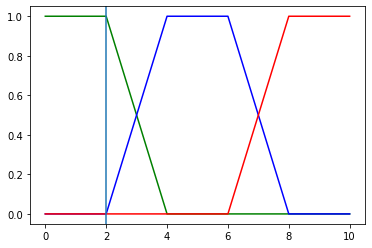

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
[1.0, 1.0, 0.5, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.5, 1.0, 0.5, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.5, 1.0]


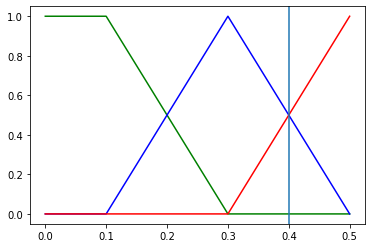

In [20]:
cur.execute('SELECT * FROM fuzzy_variables')
rows = cur.fetchall()
for i in range(1, 3):
    y = []
    x_min = []
    x_cp = []
    x_big = []
    for row in rows:
        if row[2] == i:
            y.append(row[3])
            x_min.append(row[5])
            x_cp.append(row[7])
            x_big.append(row[9])
    print(y)
    print(x_min)
    print(x_cp)
    print(x_big)
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.plot(y, x_min, color='green')
    ax.plot(y, x_cp, color='blue')
    ax.plot(y, x_big, color='red')
    if i == 1:
        plt.axvline(x=liquid_level, ymin=0, ymax=1)
    if i == 2:
        plt.axvline(x=fluid_flow, ymin=0, ymax=1)
    plt.show()


In [27]:
def phasification():
    cur.execute('SELECT * FROM fuzzy_variables')
    rows = cur.fetchall()
    for row in rows:
        # print(row)
        if row[2] == 1 and row[3] == liquid_level:
            p = row[4:]
            print('Уровень жидкости:')
            for i in range(0,len(p),2):
                val_liquid_level.append(p[i+1])
                print(f'{p[i]}: {p[i+1]}')
        if row[2] == 2 and row[3] == fluid_flow:
            p = row[4:]
            print('Расход жидкости:')
            for i in range(0,len(p),2):
                val_fluid_flow.append(p[i+1])
                print(f'{p[i]}: {p[i+1]}')
phasification()
# print(val_liquid_level)
# print(val_fluid_flow)

Уровень жидкости:
малый: 1.0
средний: 0.0
большой: 0.0
Расход жидкости:
малый: 0.0
средний: 0.5
большой: 0.5


In [29]:
agreg = []
def aggregation():
    # agreg = []
    agreg.append(min(val_liquid_level[0], val_fluid_flow[0])) #средний
    agreg.append(min(val_liquid_level[0], val_fluid_flow[1])) #большой
    agreg.append(min(val_liquid_level[0], val_fluid_flow[2])) #большой
    agreg.append(min(val_liquid_level[1], val_fluid_flow[0])) #средний
    agreg.append(min(val_liquid_level[1], val_fluid_flow[1])) #средний
    agreg.append(min(val_liquid_level[1], val_fluid_flow[2])) #большой
    agreg.append(min(val_liquid_level[2], val_fluid_flow[0])) #малый
    agreg.append(min(val_liquid_level[2], val_fluid_flow[1])) #малый
    agreg.append(min(val_liquid_level[2], val_fluid_flow[2])) #средний
    agreg1 = [agreg[i:i + 3] for i in range(0, len(agreg), 3)]
    for i in agreg1:
        print(*i)
    # print(agreg)
aggregation()

0.0 0.5 0.5
0.0 0.0 0.0
0.0 0.0 0.0


[0.0, 0.0, 0.5]


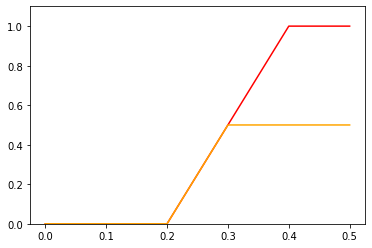

[[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0.0, 0.0, 0.0, 0.5, 0.5, 0.5]]


In [40]:
def activation():
    act_func = []
    act_func.append(max(agreg[6],agreg[7]))
    act_func.append(max(agreg[0], agreg[3], agreg[4], agreg[8]))
    act_func.append(max(agreg[1], agreg[2], agreg[5]))
    print(act_func)
    y, x_min, x_cp, x_big = [], [], [], []
    x = [x_min, x_cp, x_big]
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_ylim([0, 1.1])
    cur.execute('SELECT * FROM fuzzy_variables')
    rows = cur.fetchall()
    p = sorted(rows, key=lambda row: row[0])
    for row in p:
        if row[2] == 3:
            y.append(row[3])
            x_min.append(row[5])
            x_cp.append(row[7])
            x_big.append(row[9])
    ax.plot(y, x_big, color='red')
    for ac in range(len(act_func)):
        if act_func[ac] == 0.0:
            x[ac] = [0] * 6
        elif act_func[ac] > 0:
            for i in range(len(x[ac])):
                if x[ac][i] > act_func[ac]:
                    x[ac][i] = act_func[ac]
            
            ax.plot(y, x[ac], color='orange')
            plt.show()
    return x
    # print(x)

post_activ = activation()
print(post_activ)

[0.0, 0.0, 0.0, 0.5, 0.5, 0.5]


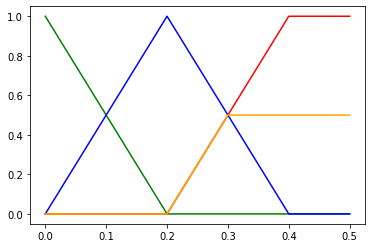

In [51]:
def accumulation():
    fig = plt.figure()
    ax = fig.add_subplot()
    y, x_min, x_cp, x_big = [], [], [], []
    cur.execute('SELECT * FROM fuzzy_variables')
    rows = cur.fetchall()
    p = sorted(rows, key=lambda row: row[0])
    for row in p:
        if row[2] == 3:
            y.append(row[3])
            x_min.append(row[5])
            x_cp.append(row[7])
            x_big.append(row[9])
    # print(y)
    ax.plot(y, x_min, color='green')
    ax.plot(y, x_cp, color='blue')
    ax.plot(y, x_big, color='red')
    for i in post_activ:
        if sum(i) > 0:
            ax.plot(y[:len(i)], i, color='orange')
            post_acum = i
            print(i)
    plt.show()
    return post_acum

post_accum = accumulation()

[0.0, 0.0, 0.0, 0.15, 0.2, 0.25] сумма равна 0.6
[0.0, 0.0, 0.0, 0.5, 0.5, 0.5] сумма равна 1.5
0.39999999999999997


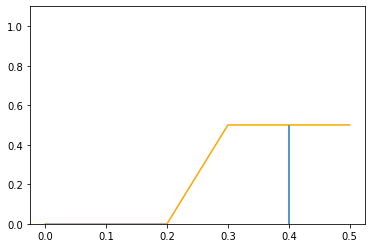

In [61]:
def defuzzification():
    y = []
    val_accum = []
    cur.execute('SELECT * FROM fuzzy_variables')
    rows = cur.fetchall()
    p = sorted(rows, key=lambda row: row[0])
    for row in p:
        if row[2] == 3:
            y.append(row[3])
    for i in range(len(y)):
        val_accum.append(y[i] * post_accum[i])

    sum_accum = sum(post_accum)
    print(f'{val_accum} сумма равна {sum(val_accum)}')
    print(f'{post_accum} сумма равна {sum(post_accum)}')
    rez = sum(val_accum) / sum(post_accum)
    print(rez)

    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_ylim([0, 1.1])

    ax.plot(y, post_accum, color='orange')
    plt.axvline(x=rez, ymin=0, ymax=0.45)
    plt.show()
    
defuzzification()